# About the Data

Source : https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

 <font size="5"><b>Haberman's Survival Data Set</b></font>

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

<font size="4"><b>Attribute's Information:</b></font>

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

# Importing the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sb

## Importing the data

In [2]:
Haberman_Data = pd.read_csv('Haberman.csv')

In [3]:
pd.DataFrame(Haberman_Data)

,patient_age_operation,patient_year_operation,auxillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


### Review Dataset

In [4]:
Haberman_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   patient_age_operation   306 non-null    int64
 1   patient_year_operation  306 non-null    int64
 2   auxillary_nodes         306 non-null    int64
 3   survival_status         306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


## Cleaning the data from the outliers

### Box plots before and after cleaning the data

### Before cleaning the data - patient_age_operation

<AxesSubplot:xlabel='survival_status', ylabel='patient_age_operation'>

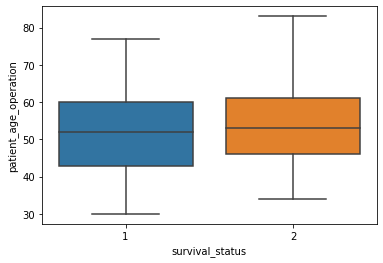

In [5]:
sb.boxplot(x='survival_status', y='patient_age_operation', data=Haberman_Data)

### Before cleaning the data - patient_year_operation

<AxesSubplot:xlabel='survival_status', ylabel='patient_year_operation'>

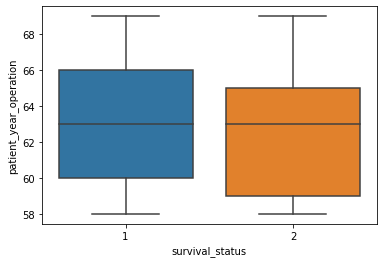

In [6]:
sb.boxplot(x='survival_status', y='patient_year_operation', data=Haberman_Data)

### Before cleaning the data - auxillary_nodes

<AxesSubplot:xlabel='survival_status', ylabel='auxillary_nodes'>

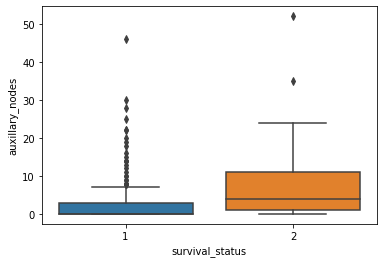

In [7]:
sb.boxplot(x='survival_status', y='auxillary_nodes', data=Haberman_Data)

Now, let's clean the data

### Cleaning the attribute - auxillary_nodes

In [8]:
Haberman_Data = Haberman_Data[((Haberman_Data['auxillary_nodes']<3) & (Haberman_Data['survival_status']==1)) | ((Haberman_Data['auxillary_nodes']<30) & (Haberman_Data['survival_status']==2))]

<AxesSubplot:xlabel='survival_status', ylabel='auxillary_nodes'>

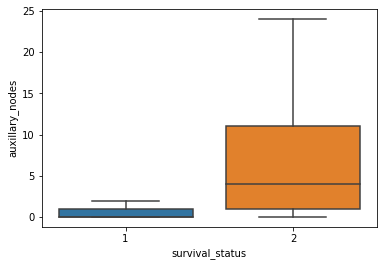

In [9]:
sb.boxplot(x='survival_status', y='auxillary_nodes', data=Haberman_Data)

### Checking the Data once again after removing outliers

In [10]:
Haberman_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   patient_age_operation   244 non-null    int64
 1   patient_year_operation  244 non-null    int64
 2   auxillary_nodes         244 non-null    int64
 3   survival_status         244 non-null    int64
dtypes: int64(4)
memory usage: 9.5 KB


## Exploring the data

 <font size="4"><b>Getting some insights by plotting differnet variables</b></font>

### Histogram Plot

These plots give us an understanding of the spread of the various types of attributes.<br><br>
Plot 1 - The minimum and maximum age of patients was 30 and 80 years respectively with patients at age of 55 being the highest in number.<br><br>
Plot 2 - The opearations carried out was the highest in the year 1958 and it decreased gradually before rising up again from 1964. However the operations reduced linearly after 1966, indicating that the need to operate on patients having Haberman decreased.<br><br>
Plot 3 - Most of patients had 0-4 auxillary nodes, while patients with more than 5 very remarkably less.<br><br>
Plot 4 - Less than half of total patients operated upon survived for only 5 years or less

array([[<AxesSubplot:title={'center':'patient_age_operation'}>,
        <AxesSubplot:title={'center':'patient_year_operation'}>],
       [<AxesSubplot:title={'center':'auxillary_nodes'}>,
        <AxesSubplot:title={'center':'survival_status'}>]], dtype=object)

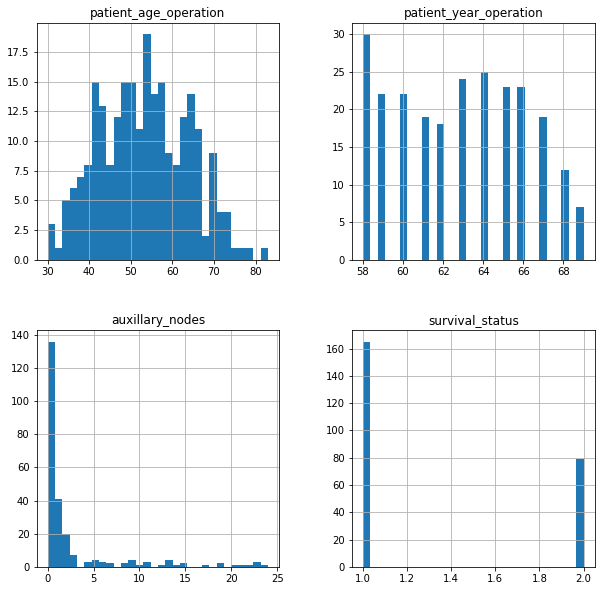

In [11]:
Haberman_Data.hist(bins = 30, figsize = (10,10))

### Jointplot

<font size="3">This plot tells us that maximum number of patients had less than 3 auxillary nodes and the highest auxillary nodes were seen in patients aged between 45 and 70 years old. </font>

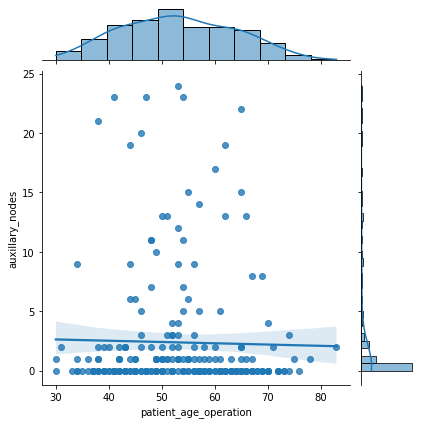

In [12]:
sb.jointplot(x='patient_age_operation' , y='auxillary_nodes' , data=Haberman_Data, kind='reg')

### Violin Plot

<font size="3">1. This plot tells us that maximum number of patients who servived for more than 5 years were those with auxillary nodes between 0-3. <br><br>
2. The rest of patients dis not survive more than 5 years had very high number of auxillary nodes in the range of 1-30 </font>

In [13]:
Haberman_Data['survival_status'].unique()

array([1, 2], dtype=int64)

<AxesSubplot:xlabel='survival_status', ylabel='auxillary_nodes'>

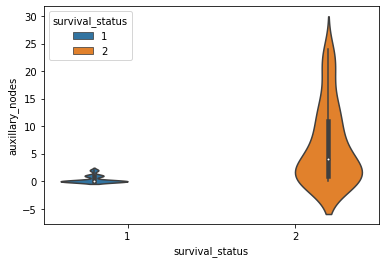

In [14]:
sb.violinplot(x='survival_status' , y='auxillary_nodes'  ,data=Haberman_Data, hue='survival_status')

### Heatmap

This plot gives a distribution of various parameters and the survival atatus.

survival_status           1.000000
auxillary_nodes           0.579593
patient_age_operation     0.036691
patient_year_operation    0.015118
Name: survival_status, dtype: float64

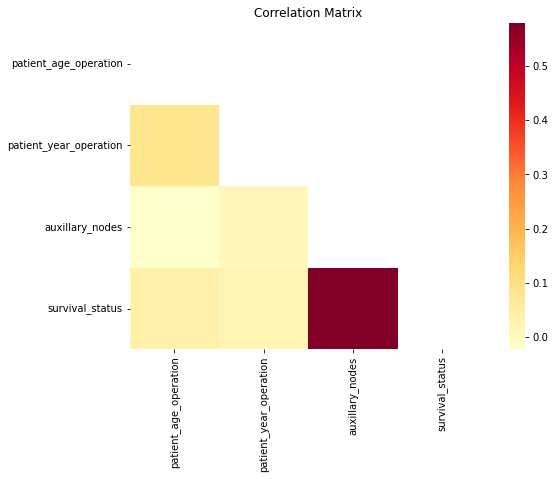

In [15]:
corr_matrix = Haberman_Data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  
plt.figure(figsize=(8, 6))  # to set the figure size
heatmap(corr_matrix, mask=mask, annot=False, lw=0, linecolor='blue', cmap='YlOrRd', fmt='0.6f')
plt.title("Correlation Matrix")  # to add title 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
  
corr_matrix['survival_status'].sort_values(ascending=False)  

### Line Plot

This plot tells us that the year of operation was between 1958 and 1970. Also, the number of patients peaked when they were 40-50 years as seen in yellow line.

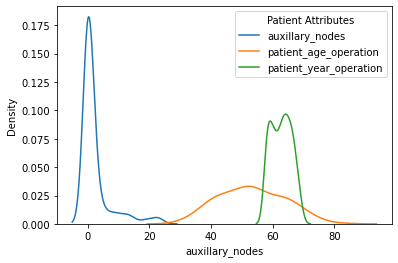

In [16]:

sb.kdeplot(Haberman_Data['auxillary_nodes'])
sb.kdeplot(Haberman_Data['patient_age_operation'])
sb.kdeplot(Haberman_Data['patient_year_operation'])

import matplotlib.pyplot as plt
plt.legend(title='Patient Attributes', loc='upper right', labels=['auxillary_nodes', 'patient_age_operation','patient_year_operation'])

## Data Processing

### Input and Output

In [17]:
X = Haberman_Data.iloc[:,:-1].values
Y = Haberman_Data.iloc[:,3].values

### Checking input and output data

In [18]:
pd.DataFrame(X)

,0,1,2
0,30,64,1
1,30,65,0
2,31,59,2
3,33,60,0
4,34,59,0
...,...,...,...
239,74,63,0
240,75,62,1
241,76,67,0
242,78,65,1


In [19]:
pd.DataFrame(Y)

,0
0,1
1,1
2,1
3,1
4,2
...,...
239,1
240,1
241,1
242,2


### Splitting the train and test data

Removing the useless feature (Patient year of operation) and the output from the dataset

In [20]:
train_data, test_data = train_test_split(Haberman_Data, test_size=0.2)

Y_train = train_data[['survival_status']].copy()
X_train = train_data.drop(['survival_status', 'patient_year_operation'], axis=1) 

In [21]:
Y_test = test_data[['survival_status']].copy()
X_test = test_data.drop(['survival_status', 'patient_year_operation'], axis=1) 

In [22]:
print(type(X_train))
print(type(Y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [23]:
pd.DataFrame(Y_train)

,survival_status
16,1
228,1
153,1
46,1
250,1
...,...
249,1
117,1
255,1
169,2


In [24]:
pd.DataFrame(X_train)

,patient_age_operation,auxillary_nodes
16,36,1
228,60,0
153,52,0
46,41,0
250,63,0
...,...,...
249,63,0
117,49,0
255,64,0
169,54,5


### data visualization after test and train set splitting

In [25]:
def plot_scatter_with_labels(X1, X2, Y, xlabel='patient_age_operation', ylabel='auxillary_nodes'):
  df = pd.DataFrame(dict(x1=X1, x2=X2, label=Y))
  groups = df.groupby('label')
  for number, group in groups:
    if number == 1:
      name = 'Survived more than 5 years'
    elif number == 2:
      name = 'Survived less than 5 years'
    plt.plot(group.x1, group.x2, marker='o', linestyle='', ms=3, label=name)

  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)


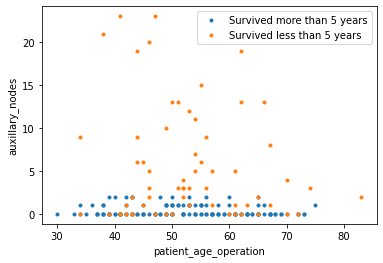

In [26]:
plot_scatter_with_labels(train_data['patient_age_operation'], train_data['auxillary_nodes'], train_data['survival_status'])

### Scaling the features separately

We standardize all the data using their mean and standard deviation


<b>Scaling X_train and X_test</b>

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
print(type(X_train))

<class 'numpy.ndarray'>


In [28]:
pd.DataFrame(X_train)

,0,1
0,-1.602259,-0.238669
1,0.707126,-0.464594
2,-0.062669,-0.464594
3,-1.121137,-0.464594
4,0.995799,-0.464594
...,...,...
190,0.995799,-0.464594
191,-0.351342,-0.464594
192,1.092023,-0.464594
193,0.129780,0.665030


In [29]:
X_test = scaler.transform(X_test)

<b>Y_train and Y_test need not be scaled as they are binary values</b>

## Exploring different machine learning tools

In [30]:
from sklearn.model_selection import cross_val_score
# importing the models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Checking if the output is numpy array and changing the shape

In [31]:
Y_train = Y_train.values.ravel()
print(type(Y_train))

print(type(X_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Discriminant Analysis Classifier

In [32]:
da_clf = LinearDiscriminantAnalysis()
da_clf.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(da_clf, X_train, Y_train, scoring='accuracy', cv=5)  # 5-fold
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores = {}
avg_cv_scores['DA'] = np.average(scores)

[0.76923077 0.76923077 0.79487179 0.87179487 0.84615385]
Averaged prediction accuracy =  0.8102564102564103


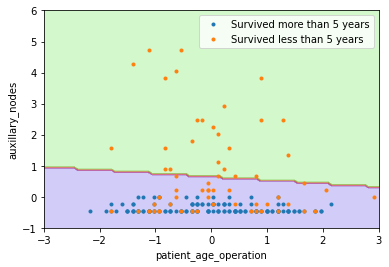

In [34]:
def plot_decision_boundary(clf, axes, inverse_transform=False):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(100, 100)
    if inverse_transform:
        X = scaler.inverse_transform(np.c_[x0s, x1s])
        x0, x1 = np.meshgrid(X[:,0], X[:,1])
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

def plot_prediction_results(clf, X, Y):
    plot_decision_boundary(clf, [-3, 3, -1, 6])
    plot_scatter_with_labels(X[:,0], X[:,1], Y, xlabel='patient_age_operation', ylabel='auxillary_nodes')
    
plot_prediction_results(da_clf, X_train, Y_train)

### Naive Bayes Classifier

[0.76923077 0.76923077 0.84615385 0.79487179 0.8974359 ]
Averaged prediction accuracy =  0.8153846153846154


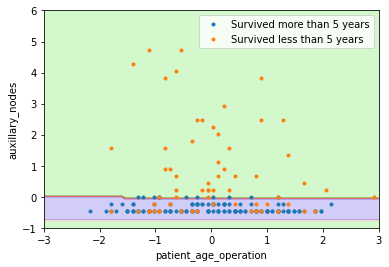

In [35]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, Y_train)
scores = cross_val_score(nb_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['NB'] = np.average(scores)
plot_prediction_results(nb_clf, X_train, Y_train)

### K-Nearst Neighbors

[0.82051282 0.79487179 0.84615385 0.8974359  0.84615385]
Averaged prediction accuracy =  0.841025641025641


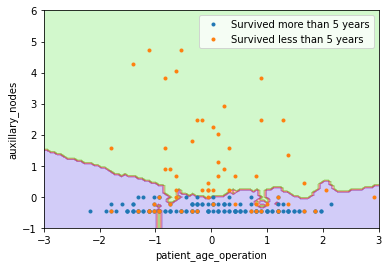

In [36]:
knn_clf = KNeighborsClassifier(n_neighbors=5) # change n_neighbors; boundary becomes smoother with increasing value of K
knn_clf.fit(X_train, Y_train)
scores = cross_val_score(knn_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['KNN'] = np.average(scores)
plot_prediction_results(knn_clf, X_train, Y_train)

### Linear SVM

[0.82051282 0.84615385 0.82051282 0.8974359  0.84615385]
Averaged prediction accuracy =  0.8461538461538461


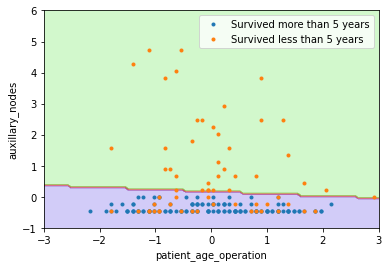

In [37]:
svmln_clf = SVC(kernel='linear')
svmln_clf.fit(X_train, Y_train)
scores = cross_val_score(svmln_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-linear'] = np.average(scores)
plot_prediction_results(svmln_clf, X_train, Y_train)

### Nonlinear SVM (Gaussian Kernel)

[0.76923077 0.82051282 0.82051282 0.87179487 0.84615385]
Averaged prediction accuracy =  0.8256410256410257


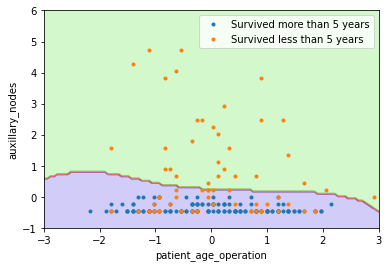

In [38]:
svmrbf_clf = SVC(kernel='rbf')
svmrbf_clf.fit(X_train, Y_train)
scores = cross_val_score(svmrbf_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-nonlinear'] = np.average(scores)
plot_prediction_results(svmrbf_clf, X_train, Y_train)

### Decision Tree

[0.79487179 0.82051282 0.84615385 0.8974359  0.87179487]
Averaged prediction accuracy =  0.8461538461538461


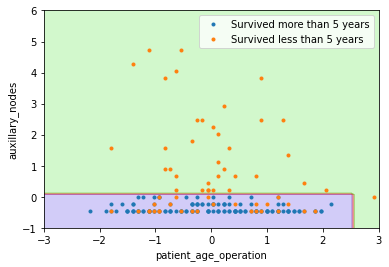

In [39]:
tree_clf = DecisionTreeClassifier(max_depth=3) # Play with hyperparameter
tree_clf.fit(X_train, Y_train)
scores = cross_val_score(tree_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['Decision Tree'] = np.average(scores)
plot_prediction_results(tree_clf, X_train, Y_train)

In [40]:
sorted_scores = sorted(avg_cv_scores.items(), key=lambda X:X[1], reverse=True)
sorted_scores

[('SVM-linear', 0.8461538461538461),
 ('Decision Tree', 0.8461538461538461),
 ('KNN', 0.841025641025641),
 ('SVM-nonlinear', 0.8256410256410257),
 ('NB', 0.8153846153846154),
 ('DA', 0.8102564102564103)]

## Using the models to predict the testset

In [41]:
Haberman_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   patient_age_operation   244 non-null    int64
 1   patient_year_operation  244 non-null    int64
 2   auxillary_nodes         244 non-null    int64
 3   survival_status         244 non-null    int64
dtypes: int64(4)
memory usage: 17.6 KB


Using the trained models to do prediction on the test set

In [42]:
test_pred_score = {}

In [43]:
# Discriminant Analysis Classifier
Y_test_pred_da = da_clf.predict(X_test)
test_pred_score['DA'] = accuracy_score(Y_test, Y_test_pred_da)

# Naive Bayes Classifier
Y_test_pred_nb = nb_clf.predict(X_test)
test_pred_score['NB'] = accuracy_score(Y_test, Y_test_pred_nb)

# K-Nearst Neighbors
Y_test_pred_knn = knn_clf.predict(X_test)
test_pred_score['KNN'] = accuracy_score(Y_test, Y_test_pred_knn)

# Linear SVM
Y_test_pred_svmln = svmln_clf.predict(X_test)
test_pred_score['SVM_Linear'] = accuracy_score(Y_test, Y_test_pred_svmln)

# Nonlinear SVM (Gaussian Kernel)
Y_test_pred_svmrbf = svmrbf_clf.predict(X_test)
test_pred_score['SVM_nonlinear'] = accuracy_score(Y_test, Y_test_pred_svmrbf)

# Decision Tree
Y_test_pred_tree_clf = tree_clf.predict(X_test)
test_pred_score['Decision Tree'] = accuracy_score(Y_test, Y_test_pred_tree_clf)

In [44]:
sorted_scores = sorted(test_pred_score.items(), key=lambda X:X[1], reverse=True)
sorted_scores

[('SVM_Linear', 0.9183673469387755),
 ('SVM_nonlinear', 0.9183673469387755),
 ('Decision Tree', 0.9183673469387755),
 ('DA', 0.8979591836734694),
 ('KNN', 0.8979591836734694),
 ('NB', 0.8775510204081632)]

## Conclusion


1. Among the various classification methods employes for the prediction, KNN and Decision tree have consistently showed better performance scores compared to other when the program was run multiple times.<br><br>

2. The classification gave highest performance values of 94.2 through KNN method for test data. However the lowest value was in the range of 80 for Discriminant analysis.<br><br>

3. Although, there is not best method, I felt we need to carry out multiple iterations using bigger data to come to a descion on which method to use. Currently, KNN, Navive Bayes are preffered.
